In [78]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [79]:
df=pd.read_csv('/archive (1).zip')
df


,Age,Sex,Chest pain type,BP,Cholesterol,FBS over 120,EKG results,Max HR,Exercise angina,ST depression,Slope of ST,Number of vessels fluro,Thallium,Heart Disease
0,70,1,4,130,322,0,2,109,0,2.4,2,3,3,Presence
1,67,0,3,115,564,0,2,160,0,1.6,2,0,7,Absence
2,57,1,2,124,261,0,0,141,0,0.3,1,0,7,Presence
3,64,1,4,128,263,0,0,105,1,0.2,2,1,7,Absence
4,74,0,2,120,269,0,2,121,1,0.2,1,1,3,Absence
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
265,52,1,3,172,199,1,0,162,0,0.5,1,0,7,Absence
266,44,1,2,120,263,0,0,173,0,0.0,1,0,7,Absence
267,56,0,2,140,294,0,2,153,0,1.3,2,0,3,Absence
268,57,1,4,140,192,0,0,148,0,0.4,2,0,6,Absence


In [80]:
df.isna().sum()

Age                        0
Sex                        0
Chest pain type            0
BP                         0
Cholesterol                0
FBS over 120               0
EKG results                0
Max HR                     0
Exercise angina            0
ST depression              0
Slope of ST                0
Number of vessels fluro    0
Thallium                   0
Heart Disease              0
dtype: int64

In [81]:
df['Heart Disease'].unique()

array(['Presence', 'Absence'], dtype=object)

In [82]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
df['Heart Disease']=le.fit_transform(df['Heart Disease'])
df

,Age,Sex,Chest pain type,BP,Cholesterol,FBS over 120,EKG results,Max HR,Exercise angina,ST depression,Slope of ST,Number of vessels fluro,Thallium,Heart Disease
0,70,1,4,130,322,0,2,109,0,2.4,2,3,3,1
1,67,0,3,115,564,0,2,160,0,1.6,2,0,7,0
2,57,1,2,124,261,0,0,141,0,0.3,1,0,7,1
3,64,1,4,128,263,0,0,105,1,0.2,2,1,7,0
4,74,0,2,120,269,0,2,121,1,0.2,1,1,3,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
265,52,1,3,172,199,1,0,162,0,0.5,1,0,7,0
266,44,1,2,120,263,0,0,173,0,0.0,1,0,7,0
267,56,0,2,140,294,0,2,153,0,1.3,2,0,3,0
268,57,1,4,140,192,0,0,148,0,0.4,2,0,6,0


In [83]:
x=df.drop('Heart Disease',axis=1)
x

,Age,Sex,Chest pain type,BP,Cholesterol,FBS over 120,EKG results,Max HR,Exercise angina,ST depression,Slope of ST,Number of vessels fluro,Thallium
0,70,1,4,130,322,0,2,109,0,2.4,2,3,3
1,67,0,3,115,564,0,2,160,0,1.6,2,0,7
2,57,1,2,124,261,0,0,141,0,0.3,1,0,7
3,64,1,4,128,263,0,0,105,1,0.2,2,1,7
4,74,0,2,120,269,0,2,121,1,0.2,1,1,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...
265,52,1,3,172,199,1,0,162,0,0.5,1,0,7
266,44,1,2,120,263,0,0,173,0,0.0,1,0,7
267,56,0,2,140,294,0,2,153,0,1.3,2,0,3
268,57,1,4,140,192,0,0,148,0,0.4,2,0,6


In [84]:
y=df['Heart Disease']
y

0      1
1      0
2      1
3      0
4      0
      ..
265    0
266    0
267    0
268    0
269    1
Name: Heart Disease, Length: 270, dtype: int64

In [85]:
from sklearn.model_selection import train_test_split
xtrain,xtest,ytrain,ytest=train_test_split(x,y,test_size=0.2,random_state=40)


In [86]:
print(xtrain.shape,xtest.shape,ytrain.shape,ytest.shape)

(216, 13) (54, 13) (216,) (54,)


In [87]:
from sklearn.linear_model import LogisticRegression
model=LogisticRegression()
model.fit(xtrain,ytrain)


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [88]:
p=model.predict(xtrain)
p

array([1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1, 1, 0, 1,
       1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 1,
       1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1,
       0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0,
       0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1,
       0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 1, 1, 1,
       1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0])

In [89]:
from sklearn.metrics import accuracy_score
a=accuracy_score(ytrain,p)*100
print("training acccuracy:",round(a,2),"%")

training acccuracy: 89.35 %


In [90]:
p1=model.predict(xtest)
p1

array([0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1,
       0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0,
       0, 1, 1, 1, 1, 1, 1, 0, 0, 0])

In [91]:
a1=accuracy_score(ytest,p1)*100
print("testing accuracy:",round(a1,2),"%")


testing accuracy: 75.93 %


In [115]:
from sklearn.metrics import confusion_matrix,roc_curve,roc_auc_score
confusion_matrix(ytest,p1)

array([[26,  5],
       [10, 13]])

<Axes: >

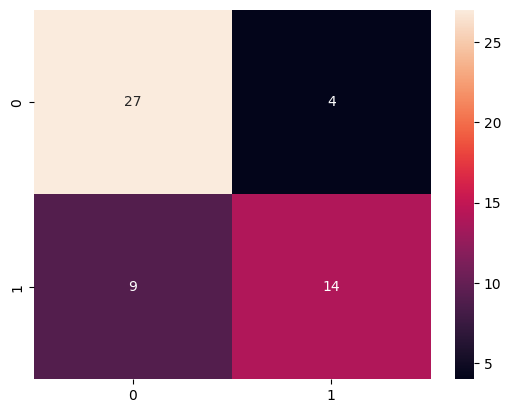

In [93]:
sns.heatmap(confusion_matrix(ytest,p1),annot=True)

In [94]:
from sklearn.svm import SVC
model1=SVC(probability=True)
model1.fit(xtrain,ytrain)

SVC(probability=True)

In [95]:
p=model1.predict(xtrain)
p

array([0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0,
       1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1,
       1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0,
       1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0])

In [96]:
a=accuracy_score(ytrain,p)*100
print("training accuracy:",round(a,2),'%')

training accuracy: 67.59 %


In [97]:
p1=model1.predict(xtest)
p1

array([0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1,
       0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 1, 0, 0, 0, 1, 1, 0, 0, 0])

In [98]:
a1=accuracy_score(ytest,p1)*100
print("testing accuracy:",round(a1,2),'%')

testing accuracy: 62.96 %


In [99]:
confusion_matrix(ytest,p1)

array([[25,  6],
       [14,  9]])

<Axes: >

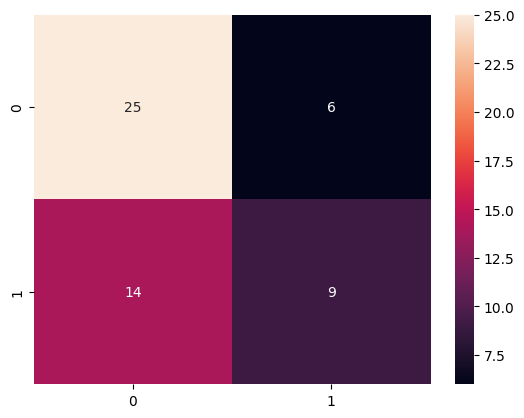

In [100]:
sns.heatmap(confusion_matrix(ytest,p1),annot=True)

In [101]:
from sklearn.ensemble import RandomForestClassifier
model2=RandomForestClassifier()
model2.fit(xtrain,ytrain)

RandomForestClassifier()

In [102]:
p=model2.predict(xtrain)
p

array([1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1, 1, 0, 1,
       1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1,
       1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1,
       0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1,
       0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0,
       0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 1,
       0, 1, 0, 1, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0,
       0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1,
       0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0])

In [103]:
a=accuracy_score(ytrain,p)*100
print("training accuracy:",round(a,2),'%')

training accuracy: 100.0 %


In [104]:
p1=model2.predict(xtest)
p1

array([0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 1,
       0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0,
       0, 1, 0, 1, 1, 1, 1, 0, 0, 0])

In [105]:
a1=accuracy_score(ytest,p1)*100
print("testing accuracy:",round(a1,2),"%")


testing accuracy: 72.22 %


In [106]:
confusion_matrix(ytest,p1)

array([[26,  5],
       [10, 13]])

<Axes: >

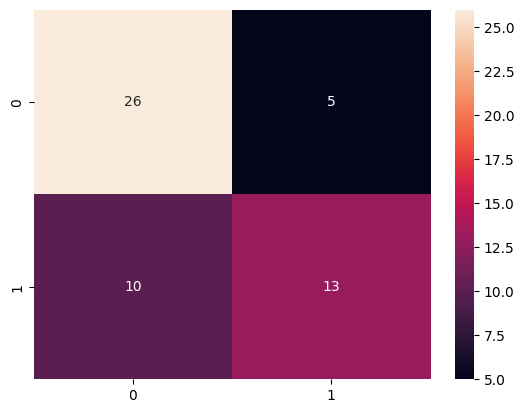

In [107]:
sns.heatmap(confusion_matrix(ytest,p1),annot=True)

In [108]:
pred1=model.predict_proba(xtest)
pred1

array([[9.87056385e-01, 1.29436154e-02],
       [9.73180321e-01, 2.68196785e-02],
       [2.36746127e-03, 9.97632539e-01],
       [9.61902063e-01, 3.80979366e-02],
       [2.73413021e-02, 9.72658698e-01],
       [9.86962341e-01, 1.30376592e-02],
       [1.46435908e-02, 9.85356409e-01],
       [8.26810065e-01, 1.73189935e-01],
       [9.69871391e-01, 3.01286086e-02],
       [8.72551834e-01, 1.27448166e-01],
       [9.83390962e-01, 1.66090384e-02],
       [8.88321083e-01, 1.11678917e-01],
       [7.93566510e-01, 2.06433490e-01],
       [8.90084252e-01, 1.09915748e-01],
       [8.61699953e-01, 1.38300047e-01],
       [2.00156948e-02, 9.79984305e-01],
       [1.95676129e-02, 9.80432387e-01],
       [9.78110629e-01, 2.18893714e-02],
       [6.00500876e-01, 3.99499124e-01],
       [8.91361171e-01, 1.08638829e-01],
       [9.76133489e-01, 2.38665109e-02],
       [5.29966650e-04, 9.99470033e-01],
       [9.84609067e-01, 1.53909329e-02],
       [1.38818567e-03, 9.98611814e-01],
       [2.380900

In [109]:
pred2=model1.predict_proba(xtest)
pred2

array([[0.75523836, 0.24476164],
       [0.6203523 , 0.3796477 ],
       [0.1185595 , 0.8814405 ],
       [0.87345526, 0.12654474],
       [0.56879925, 0.43120075],
       [0.89487712, 0.10512288],
       [0.6249985 , 0.3750015 ],
       [0.74720514, 0.25279486],
       [0.18958539, 0.81041461],
       [0.29203754, 0.70796246],
       [0.86178484, 0.13821516],
       [0.5       , 0.5       ],
       [0.51095462, 0.48904538],
       [0.5       , 0.5       ],
       [0.50832868, 0.49167132],
       [0.19194188, 0.80805812],
       [0.13554937, 0.86445063],
       [0.71447381, 0.28552619],
       [0.7874564 , 0.2125436 ],
       [0.1941578 , 0.8058422 ],
       [0.77693324, 0.22306676],
       [0.16139779, 0.83860221],
       [0.81767148, 0.18232852],
       [0.18478003, 0.81521997],
       [0.53035708, 0.46964292],
       [0.66555835, 0.33444165],
       [0.27963423, 0.72036577],
       [0.84371165, 0.15628835],
       [0.64023016, 0.35976984],
       [0.81050646, 0.18949354],
       [0.

In [110]:
pred3=model2.predict_proba(xtest)
pred3

array([[0.99, 0.01],
       [0.68, 0.32],
       [0.02, 0.98],
       [0.67, 0.33],
       [0.65, 0.35],
       [0.99, 0.01],
       [0.2 , 0.8 ],
       [0.52, 0.48],
       [0.69, 0.31],
       [0.87, 0.13],
       [0.98, 0.02],
       [0.75, 0.25],
       [0.47, 0.53],
       [0.87, 0.13],
       [0.64, 0.36],
       [0.3 , 0.7 ],
       [0.08, 0.92],
       [0.69, 0.31],
       [0.44, 0.56],
       [0.76, 0.24],
       [0.99, 0.01],
       [0.08, 0.92],
       [1.  , 0.  ],
       [0.17, 0.83],
       [0.15, 0.85],
       [0.23, 0.77],
       [0.54, 0.46],
       [0.83, 0.17],
       [0.72, 0.28],
       [0.91, 0.09],
       [0.89, 0.11],
       [0.04, 0.96],
       [0.97, 0.03],
       [0.78, 0.22],
       [0.87, 0.13],
       [0.88, 0.12],
       [0.51, 0.49],
       [0.99, 0.01],
       [0.76, 0.24],
       [0.9 , 0.1 ],
       [0.35, 0.65],
       [0.17, 0.83],
       [0.95, 0.05],
       [0.95, 0.05],
       [0.81, 0.19],
       [0.12, 0.88],
       [0.65, 0.35],
       [0.25,

In [111]:
fpr,tpr,thresh=roc_curve(ytest,pred1[:,1],pos_label=1)
fpr1,tpr1,thresh1=roc_curve(ytest,pred2[:,1],pos_label=1)
fpr2,tpr2,thresh2=roc_curve(ytest,pred3[:,1],pos_label=1)

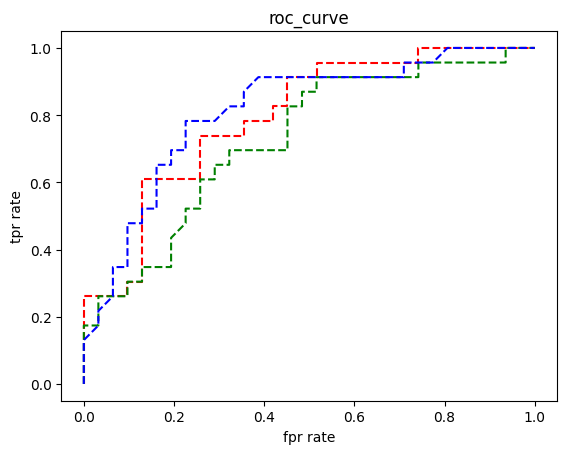

In [114]:
plt.plot(fpr,tpr,'r--',label='logistic regression')
plt.plot(fpr1,tpr1,'g--',label='SVC')
plt.plot(fpr2,tpr2,'b--',label='Random Forest Classifier')
plt.xlabel('fpr rate')
plt.ylabel('tpr rate')
plt.title('roc_curve')
plt.show()


In [121]:
roc_auc_score(ytest,pred1[:,1])



0.7952314165497897

In [123]:
roc_auc_score(ytest,pred2[:,1],multi_class='ovo')


0.7272089761570827

In [124]:
roc_auc_score(ytest,pred3[:,1],multi_class='ovo')

0.8127629733520336

In [125]:
a=[[70,1,4,130,322,0,2,109,0,2.4,2,3,3]]
b=model2.predict(a)
b

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


array([1])

In [128]:
if b[0]==1:
  print("absence")
else:
  print("presence")

absence
